# Smart Aliens:
## Using Statistical Interference to Find Exoplanets that Could Harbor Intelligent Beings
---

### by Julian Estrada & William Walker

- 
 

In [2]:
#### IMPORT Everything here ####
import ast
import bs4
import flask
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
import scipy
import scipy.stats as st
import sqlalchemy




from bs4 import BeautifulSoup

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

#from selenium import webdriver
#from splinter import Browser

# Part I: Using Flask

In [2]:
## API Flask ##

## Import via loading in csv file until API works

 

In [3]:
## Read in csv file ##
exoplanet_metadata_path = "../data/exoplanet-archive.csv"
exoplanet_metadata = pd.read_csv(exoplanet_metadata_path)


/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_1171/2707146230.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  exoplanet_metadata = pd.read_csv(exoplanet_metadata_path)


# Part II: Cleaning the Data

In [4]:
## Create exoplanet dataframe with columns we want ##
exoplanet_df = exoplanet_metadata[[
    "pl_name", "hostname", "disc_year", "discoverymethod", "pl_orbper", "pl_orbsmax",\
          "pl_rade", "pl_masse", "pl_bmasse", "pl_insol", "pl_eqt", "st_spectype", "st_teff",\
              "glat", "glon", "sy_dist"
]]


In [5]:
## Math Constants ##
e = np.e
pi = np.pi


## Math Operations ##
arccos = np.arccos
arcsin = np.arcsin
cos = np.cos
ln = np.log
sin = np.sin
sqrt = np.sqrt

In [6]:

## Convert distance to Light-Years ##
lightyear = ((2 ** 2) * 3 * (5 ** 3) * 877 * 7789 ) / (pi * 7 * 487 * 293339)
exoplanet_df["sy_dist"] = exoplanet_df["sy_dist"] * lightyear

## Experimental average gravity of Earth in m/s^2 ##
g_earth = 9.8203

## Insert Gravity columns ##
exoplanet_df["pl_gravitye"] = exoplanet_df["pl_masse"] / (exoplanet_df["pl_rade"] ** 2)
exoplanet_df["pl_gravity"] = round(g_earth * exoplanet_df["pl_gravitye"], 4)

## X and Y value coordinates in Light-Years ##
exoplanet_df["xVal"] = exoplanet_df["sy_dist"] * -sin( exoplanet_df["glon"] * pi / 180 )\
      * cos( exoplanet_df["glat"] * pi / 180 )
exoplanet_df["yVal"] = exoplanet_df["sy_dist"] * cos( exoplanet_df["glon"] * pi / 180 )\
      * cos( exoplanet_df["glat"] * pi / 180 )



/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_1171/3860229935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df["sy_dist"] = exoplanet_df["sy_dist"] * lightyear
/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_1171/3860229935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplanet_df["pl_gravitye"] = exoplanet_df["pl_masse"] / (exoplanet_df["pl_rade"] ** 2)
/var/folders/hf/mp5v5rls3hg252gfcnygxxpw0000gn/T/ipykernel_1171/3860229935.py:10: SettingWithCopyWarning: 
A

In [7]:
## Reorder Columns ##
exoplanet_df = exoplanet_df[[
    "pl_name", "hostname", "disc_year", "discoverymethod", "pl_orbper", "pl_orbsmax",\
          "pl_rade", "pl_masse", "pl_gravity", "pl_insol", "pl_eqt",\
              "st_spectype", "st_teff", "glat", "glon", "sy_dist", "xVal", "yVal"
]]

## Drop all rows with Null values ##
exoplanet_df = exoplanet_df.dropna()

## Drop all rows with repeated planets ##
exoplanet_df = exoplanet_df.drop_duplicates(subset=["pl_name"], keep= False)

## How many Planets do we have? ##
print( f"How many unique Exoplanets have Full Data? It's { len( exoplanet_df['pl_name'].unique() ) }!" )



exoplanet_df.head(25)


How many unique Exoplanets have Full Data? It's 162!


,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal
343,CoRoTID 223977153 b,CoRoTID 223977153,2017,Transit,6.718370,0.07100,6.389,47.67450,11.4695,132.26,938.0,G0 VI,5970.0,1.86373,203.48237,1880.888384,749.075238,-1724.205756
472,EPIC 246851721 b,EPIC 246851721,2018,Transit,6.180235,0.07229,11.781,953.49000,67.4647,642.00,1401.0,F5 V,6202.0,-12.64088,186.97531,1215.363033,144.018068,-1177.126315
474,EPIC 249893012 b,EPIC 249893012,2020,Transit,3.595100,0.04700,1.950,8.75000,22.5977,1037.00,1616.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
475,EPIC 249893012 c,EPIC 249893012,2020,Transit,15.624000,0.13000,3.670,14.67000,10.6960,160.00,990.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
476,EPIC 249893012 d,EPIC 249893012,2020,Transit,35.747000,0.22000,3.940,10.18000,6.4399,53.00,752.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327
481,G 9-40 b,G 9-40,2019,Transit,5.746007,0.03850,2.025,11.70000,28.0195,7.20,456.0,M2.5 V,3348.0,37.03563,206.06509,91.087649,31.948946,-65.316615
506,GJ 1214 b,GJ 1214,2009,Transit,1.580404,0.01490,2.742,8.17000,10.6712,21.00,596.0,M4 V,3250.0,23.60704,26.16217,47.758100,-19.294982,39.278025
600,GJ 357 b,GJ 357,2019,Transit,3.930720,0.03500,1.217,1.84000,12.2000,12.60,525.0,M2.5 V,3505.0,22.08045,253.88843,30.795065,27.415639,-7.919115
604,GJ 367 b,GJ 367,2021,Transit,0.321923,0.00709,0.699,0.63300,12.7225,579.00,1365.0,M1.0 V,3522.0,5.65890,272.24323,30.699893,30.526867,1.195791
612,GJ 3929 b,GJ 3929,2022,Transit,2.616274,0.02569,1.150,1.21000,8.9849,17.50,569.0,M3.5 V,3369.0,49.59735,56.66419,51.563693,-27.922271,18.366496


In [8]:
#### Get most Earth-Like planets ####
earthRankList = []

earthRade = 1
earthMass = 1
earthEQT = 255


for i in range(0, len(exoplanet_df["pl_name"])):
  

    ## radii arg ##
    radARG = float( list(exoplanet_df["pl_rade"])[i] ) - earthRade

    ## mass arg ##
    massARG = float(list(exoplanet_df["pl_masse"])[i]) - earthMass

    ## temp arg ##
    tempARG =  ( float(list(exoplanet_df["pl_eqt"])[i]) - earthEQT) / earthEQT


    ## Average specs out ##
    earthRank = round(100 * np.e ** (-sqrt( radARG ** 2 + massARG ** 2 + tempARG ** 2 )/4), 3)
    earthRankList.append(earthRank)

exoplanet_df["earth-like-score"] = earthRankList


#### Habitability Score (via Big Alien Theory) ####

alienRankList = []

alien_rad = 0.8
## Rocky Planet Mass and Radius are correlated by a Lambert W Function ##
## mass * (33.0120 ** (mass ** -0.0352215) ) = (33.9270 * radius ** 3) ##
## (close to m = 0.9757 * r ** 3) ##
alien_mass = 0.4802
alienTemp = 240


for j in range(0, len(exoplanet_df["pl_name"])):

    ## radii arg ##
    radARG = float(list(exoplanet_df["pl_rade"])[j]) - alien_rad

    ## mass arg ##
    massARG = float(list(exoplanet_df["pl_masse"])[j]) - alien_mass

    ## temp arg ##
    tempARG =  ( float(list(exoplanet_df["pl_eqt"])[j]) - alienTemp) / alienTemp


    ## Average specs out ##
    lifeRank = round(100 * e ** (-sqrt( (radARG ** 2) + (massARG ** 2) + (tempARG ** 2) )/4), 3)
    alienRankList.append(lifeRank)

exoplanet_df["habitability-score"] = alienRankList

exoplanet_df.head(10)


,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal,earth-like-score,habitability-score
343,CoRoTID 223977153 b,CoRoTID 223977153,2017,Transit,6.718370,0.07100,6.389,47.6745,11.4695,132.26,938.0,G0 VI,5970.0,1.86373,203.48237,1880.888384,749.075238,-1724.205756,0.001,0.001
472,EPIC 246851721 b,EPIC 246851721,2018,Transit,6.180235,0.07229,11.781,953.4900,67.4647,642.00,1401.0,F5 V,6202.0,-12.64088,186.97531,1215.363033,144.018068,-1177.126315,0.000,0.000
474,EPIC 249893012 b,EPIC 249893012,2020,Transit,3.595100,0.04700,1.950,8.7500,22.5977,1037.00,1616.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327,9.400,7.949
475,EPIC 249893012 c,EPIC 249893012,2020,Transit,15.624000,0.13000,3.670,14.6700,10.6960,160.00,990.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327,2.856,2.466
476,EPIC 249893012 d,EPIC 249893012,2020,Transit,35.747000,0.22000,3.940,10.1800,6.4399,53.00,752.0,G8 IV/V,5430.0,34.30816,345.11043,1047.927395,222.423647,836.542327,8.556,7.397
481,G 9-40 b,G 9-40,2019,Transit,5.746007,0.03850,2.025,11.7000,28.0195,7.20,456.0,M2.5 V,3348.0,37.03563,206.06509,91.087649,31.948946,-65.316615,6.758,5.898
506,GJ 1214 b,GJ 1214,2009,Transit,1.580404,0.01490,2.742,8.1700,10.6712,21.00,596.0,M4 V,3250.0,23.60704,26.16217,47.758100,-19.294982,39.278025,15.340,13.303
600,GJ 357 b,GJ 357,2019,Transit,3.930720,0.03500,1.217,1.8400,12.2000,12.60,525.0,M2.5 V,3505.0,22.08045,253.88843,30.795065,27.415639,-7.919115,71.019,62.926
604,GJ 367 b,GJ 367,2021,Transit,0.321923,0.00709,0.699,0.6330,12.7225,579.00,1365.0,M1.0 V,3522.0,5.65890,272.24323,30.699893,30.526867,1.195791,33.464,30.951
612,GJ 3929 b,GJ 3929,2022,Transit,2.616274,0.02569,1.150,1.2100,8.9849,17.50,569.0,M3.5 V,3369.0,49.59735,56.66419,51.563693,-27.922271,18.366496,73.013,67.167


# Part III: Export data as JSON File

In [13]:
#pl_rade, Xval, Yval, habitablity-score, pl_insol, pl_eqt, pl_masse, pl_gravity, earth-like-score 


In [9]:


selected_columns = ['pl_rade', 'xVal', 'yVal', 'habitability-score', 'pl_insol', 'pl_eqt', 'pl_masse', 'pl_gravity', 'earth-like-score']


exo_json = exoplanet_df[selected_columns].to_json(orient='records')


In [10]:
exo_json

'[{"pl_rade":6.389,"xVal":749.0752380836,"yVal":-1724.2057555368,"habitability-score":0.001,"pl_insol":132.26,"pl_eqt":938.0,"pl_masse":47.6745,"pl_gravity":11.4695,"earth-like-score":0.001},{"pl_rade":11.781,"xVal":144.0180682101,"yVal":-1177.1263148617,"habitability-score":0.0,"pl_insol":642.0,"pl_eqt":1401.0,"pl_masse":953.49,"pl_gravity":67.4647,"earth-like-score":0.0},{"pl_rade":1.95,"xVal":222.4236469642,"yVal":836.5423269313,"habitability-score":7.949,"pl_insol":1037.0,"pl_eqt":1616.0,"pl_masse":8.75,"pl_gravity":22.5977,"earth-like-score":9.4},{"pl_rade":3.67,"xVal":222.4236469642,"yVal":836.5423269313,"habitability-score":2.466,"pl_insol":160.0,"pl_eqt":990.0,"pl_masse":14.67,"pl_gravity":10.696,"earth-like-score":2.856},{"pl_rade":3.94,"xVal":222.4236469642,"yVal":836.5423269313,"habitability-score":7.397,"pl_insol":53.0,"pl_eqt":752.0,"pl_masse":10.18,"pl_gravity":6.4399,"earth-like-score":8.556},{"pl_rade":2.025,"xVal":31.9489459072,"yVal":-65.316614793,"habitability-score"

In [11]:

with open('exoplanet_data.json', 'w') as json_file:
    json_file.write(exo_json)


In [12]:
## Name of File: ##
file_name = 'exoplanet_df'
## Upload Dataframe to csv file ##
exoplanet_df.to_csv(f"../data/{file_name}.csv", sep=',', encoding='utf-8')

# Scratch Work

In [50]:
## Getting Vals into Lists for js ##
xValList = list(exoplanet_df["xVal"])
yValList = list(exoplanet_df["yVal"])

planetNameList = list(exoplanet_df["pl_name"])

for i in range(0, len(xValList)):
    xValList[i] = round(xValList[i], 3)

for j in range(0, len(yValList)):
    yValList[j] = round(yValList[j], 3)


print(xValList)
print(yValList)
print(planetNameList)

[749.075, 144.018, 222.424, 222.424, 222.424, 31.949, -19.295, 27.416, 30.527, -27.922, 6.817, -1456.25, 177.781, 1062.842, 1698.211, -705.154, 282.406, -164.028, -164.028, -164.028, 45.089, -74.606, 89.584, 89.584, 89.584, 89.584, 89.584, 8.783, 8.783, -251.819, 131.566, 83.561, 83.561, 59.347, 59.347, 114.638, 65.867, 222.388, 337.922, -179.195, 91.23, 91.23, -4.035, -295.366, -295.366, -295.366, -295.366, 142.018, 81.621, 81.621, 81.621, 35.37, 103.275, -603.736, 480.648, -404.56, -1455.401, -289.727, 173.811, -654.391, -365.414, -1682.303, -1225.19, 32.316, 32.316, 32.316, -9.141, 67.03, 67.03, 54.672, 54.672, 533.205, 1251.673, 1651.779, 1418.568, 2210.713, 2977.65, -631.762, 1735.008, -2027.901, -907.961, -988.008, 189.497, 81.369, 757.785, 15.193, 87.923, -60.834, -437.226, -437.226, -437.226, -437.226, 209.06, 209.06, 209.06, -101.946, -101.946, 32.613, -72.552, -481.746, -88.105, -144.261, -144.261, 920.298, -42.957, 843.541, -117.831, -80.451, -126.083, 193.49, -9.537, -403.5

In [36]:
## vals of temp and insolence ##
insolValList = list(exoplanet_df["pl_insol"])
tempValList = list(exoplanet_df["pl_eqt"])

for k in range(0, len(insolValList)):
    insolValList[k] *= 1361

print(insolValList)
print(tempValList)

[180005.86, 873762.0, 1411357.0, 217760.0, 72133.0, 9799.2, 28581.0, 17148.6, 788019.0, 23817.5, 54848.299999999996, 6328650.0, 251512.80000000002, 98944.7, 4069390.0, 763521.0, 1001001.89, 136100.0, 28581.0, 19462.3, 99216.90000000001, 36066.5, 21776.0, 10833.56, 159237.0, 63558.700000000004, 35794.3, 57434.200000000004, 21912.100000000002, 133500.49, 179652.0, 58931.299999999996, 13882.199999999999, 3944178.0, 740111.7999999999, 10098.62, 899621.0, 2606315.0, 91187.0, 337528.0, 81660.0, 32664.0, 13487.51, 318895.91, 68526.35, 33494.21, 14290.5, 91187.0, 14290.5, 4314.37, 1959.84, 6560.02, 816600.0, 4289872.0, 3184740.0, 5937362.5, 4014950.0, 1348995.98, 2504240.0, 61108900.0, 992169.0, 408.3, 1197.68, 33616.7, 17420.8, 6818.61, 626.0600000000001, 3593.04, 7934.63, 5566.49, 1238.51, 88873.3, 566176.0, 578425.0, 653280.0, 1578760.0, 1150045.0, 684583.0, 992169.0, 1810130.0, 835654.0, 910509.0, 315752.0, 693021.2, 724052.0, 55256.6, 2626.73, 82068.3, 266756.0, 175569.0, 38108.0, 14971.0

In [37]:
## vals of radii and masses ##
radiiValList = list(exoplanet_df["pl_rade"])
massValList = list(exoplanet_df["pl_masse"])

print(radiiValList)
print(massValList)



[6.389, 11.781, 1.95, 3.67, 3.94, 2.025, 2.742, 1.217, 0.699, 1.15, 1.305, 16.477, 12.016, 8.709, 14.986, 13.843, 2.05, 3.41, 3.195, 2.995, 2.25, 2.501, 2.0, 1.87, 0.75, 0.818, 1.137, 1.24, 1.533, 9.718, 2.45, 2.79, 2.39, 1.35, 3.228, 3.89, 22.754, 3.88, 2.242, 1.75, 5.68, 7.82, 3.44, 2.59, 3.53, 2.48, 1.95, 2.63, 2.078, 1.582, 1.458, 1.015, 15.681, 17.598, 21.409, 19.515, 17.777, 14.83, 19.044, 21.196, 11.545, 9.18, 3.87, 0.85, 1.385, 1.521, 1.43, 2.438, 1.032, 1.32, 1.367, 14.908, 11.747, 12.33, 14.572, 13.899, 13.563, 12.218, 11.994, 12.285, 12.722, 12.408, 2.265, 1.791, 14.572, 2.415, 3.65, 1.694, 3.01, 2.51, 3.51, 3.78, 2.726, 2.759, 2.93, 2.34, 2.82, 3.42, 1.62, 16.701, 1.672, 2.18, 2.47, 14.415, 1.79, 12.173, 1.9, 5.05, 3.14, 16.141, 6.956, 12.89, 1.25, 1.33, 2.19, 11.321, 3.51, 1.52, 18.103, 2.77, 8.295, 11.321, 12.0, 5.14, 6.0, 7.9, 3.02, 5.93, 6.18, 12.285, 13.675, 2.68, 5.09, 11.68, 1.166, 11.6, 11.9, 11.31, 1.425, 2.91, 2.82, 2.55, 18.977, 9.236, 5.25, 1.992, 1.85, 2.02, 2.

# Part III: Further manipulation

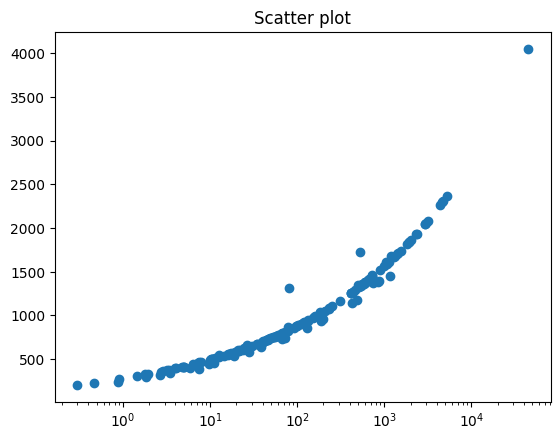

In [57]:
ax = plt.axes()
x = list(exoplanet_df["pl_insol"])
y = list(exoplanet_df["pl_eqt"])

ax.scatter( x, y )
ax.set_title('Scatter plot')
ax.set_xscale('log')
plt.show()

In [82]:
exoplanet_df.loc[exoplanet_df["pl_name"] == 'LP 791-18 d', :]

,pl_name,hostname,disc_year,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_gravity,pl_insol,pl_eqt,st_spectype,st_teff,glat,glon,sy_dist,xVal,yVal,earth-like-score,habitability-score
32310,LP 791-18 d,LP 791-18,2023,Transit,2.753436,0.01992,1.032,0.9,8.2987,5.83,396.0,M(6.1 +/- 0.7) V,2960.0,39.10605,268.56582,86.407631,67.029572,-1.678179,86.875,81.713


In [39]:
varlist = []
for i in range(0, 162):
    varlist.append(i)

print(varlist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]


In [17]:
masses = list(exoplanet_df["pl_rade"])
massList = []

for i in range(0, len(masses)):
    mass = round(masses[i] * 100, 3)
    massList.append(mass)



print(massList)

[638.9, 1178.1, 195.0, 367.0, 394.0, 202.5, 274.2, 121.7, 69.9, 115.0, 130.5, 1647.7, 1201.6, 870.9, 1498.6, 1384.3, 205.0, 341.0, 319.5, 299.5, 225.0, 250.1, 200.0, 187.0, 75.0, 81.8, 113.7, 124.0, 153.3, 971.8, 245.0, 279.0, 239.0, 135.0, 322.8, 389.0, 2275.4, 388.0, 224.2, 175.0, 568.0, 782.0, 344.0, 259.0, 353.0, 248.0, 195.0, 263.0, 207.8, 158.2, 145.8, 101.5, 1568.1, 1759.8, 2140.9, 1951.5, 1777.7, 1483.0, 1904.4, 2119.6, 1154.5, 918.0, 387.0, 85.0, 138.5, 152.1, 143.0, 243.8, 103.2, 132.0, 136.7, 1490.8, 1174.7, 1233.0, 1457.2, 1389.9, 1356.3, 1221.8, 1199.4, 1228.5, 1272.2, 1240.8, 226.5, 179.1, 1457.2, 241.5, 365.0, 169.4, 301.0, 251.0, 351.0, 378.0, 272.6, 275.9, 293.0, 234.0, 282.0, 342.0, 162.0, 1670.1, 167.2, 218.0, 247.0, 1441.5, 179.0, 1217.3, 190.0, 505.0, 314.0, 1614.1, 695.6, 1289.0, 125.0, 133.0, 219.0, 1132.1, 351.0, 152.0, 1810.3, 277.0, 829.5, 1132.1, 1200.0, 514.0, 600.0, 790.0, 302.0, 593.0, 618.0, 1228.5, 1367.5, 268.0, 509.0, 1168.0, 116.6, 1160.0, 1190.0, 113

In [13]:
orbitList.max()

AttributeError: 'list' object has no attribute 'max'

In [ ]:
# HD 110113 b: 16, 22 (+6)
# HD 207897 b: 21, 27 (+6)
# HD 23472 f: 26, 32 (+6)
# HD 260655 b: 27, 34 (+7)
# K2-216 b: 38, 46 (+8)
# K2-216 b: 39, 47 (+8)
# Qatar-4 b: 80, 96 (+16)
# TOI-1062 b: 82, 98 (+16)
# TOI-1075 b: 83, 99 (+16)
# K2 24 b:
# 


In [83]:
print(list(exoplanet_df["pl_name"]))

['CoRoTID 223977153 b', 'EPIC 246851721 b', 'EPIC 249893012 b', 'EPIC 249893012 c', 'EPIC 249893012 d', 'G 9-40 b', 'GJ 1214 b', 'GJ 357 b', 'GJ 367 b', 'GJ 3929 b', 'GJ 486 b', 'GPX-1 b', 'HAT-P-68 b', 'HATS-17 b', 'HATS-18 b', 'HATS-36 b', 'HD 110113 b', 'HD 191939 b', 'HD 191939 c', 'HD 191939 d', 'HD 207496 b', 'HD 207897 b', 'HD 23472 b', 'HD 23472 c', 'HD 23472 d', 'HD 23472 e', 'HD 23472 f', 'HD 260655 b', 'HD 260655 c', 'HD 332231 b', 'HD 5278 b', 'HD 73583 b', 'HD 73583 c', 'HD 93963 A b', 'HD 93963 A c', 'HD 95338 b', 'HIP 65 A b', 'K2-100 b', 'K2-180 b', 'K2-216 b', 'K2-24 b', 'K2-24 c', 'K2-25 b', 'K2-285 b', 'K2-285 c', 'K2-285 d', 'K2-285 e', 'K2-292 b', 'K2-3 b', 'K2-3 c', 'K2-3 d', 'K2-415 b', 'KELT-10 b', 'KELT-18 b', 'KELT-19 A b', 'KELT-20 b', 'KELT-21 b', 'KELT-23 A b', 'KELT-4 A b', 'KELT-9 b', 'KPS-1 b', 'Kepler-1654 b', 'Kepler-1661 b', 'L 98-59 b', 'L 98-59 c', 'L 98-59 d', 'LHS 1140 b', 'LP 791-18 c', 'LP 791-18 d', 'LP 890-9 b', 'LP 890-9 c', 'NGTS-1 b', 'NGTS

In [86]:
list(exoplanet_df["pl_name"])[68]

'LP 791-18 d'

In [60]:
starType = list(exoplanet_df["st_spectype"])

starMassList = []

for star in range(0, len(starType)):
    if starType[star][0] == 'M':
        starMass = 0.265

    elif starType[star][0] == 'K':
        starMass = 0.58
    
    elif starType[star][0] == 'G':
        starMass = 0.92

    elif starType[star][0] == 'F':
        starMass = 1.22

    elif starType[star][0] == 'A':
        starMass = 1.75
    
    elif starType[star][0] == 'B':
        starMass = 14

    elif starType[star][0] == 'O':
        starMass = 22

    starMassList.append(starMass)

In [69]:
orbits = list(exoplanet_df["pl_orbsmax"])
masses = list(exoplanet_df["pl_masse"])
radii = list(exoplanet_df["pl_rade"])

In [90]:
tidalLockProbability = []
for i in range(0, len(starMassList)):
    tidalTime = 6 * 10 ** 19 * (orbits[i] ** 6 * radii[i])/(masses[i] * starMassList[i] ** 2 )
    tidalProb = round(1000 / (ln (tidalTime)), 3)
    tidalLockProbability.append(tidalProb)
    


In [93]:
1000 / (ln ( 6 * 10 ** 19 ))

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method

In [1]:
orbits *= 100



NameError: name 'orbits' is not defined

In [95]:
SuperLifeList = []

for j in range(0, len(exoplanet_df["pl_name"])):

    ## radii arg ##
    radARG = float(list(exoplanet_df["pl_rade"])[j]) - alien_rad

    ## mass arg ##
    massARG = float(list(exoplanet_df["pl_masse"])[j]) - alien_mass

    ## temp arg ##
    tidelockARG =  ( tidalLockProbability[j] - 21.958) / 21.958


    ## Average specs out ##
    superlifeRank = round(100 * e ** (-sqrt( (radARG ** 2) + (massARG ** 2) + (tidelockARG ** 2) )/4), 3)
    SuperLifeList.append(superlifeRank)



print(SuperLifeList)

[0.001, 0.0, 12.295, 2.676, 7.81, 5.919, 13.517, 67.67, 69.423, 76.023, 52.422, 0.0, 0.0, 0.0, 0.0, 0.0, 33.8, 8.446, 13.881, 44.896, 23.272, 2.997, 13.732, 45.693, 85.449, 87.305, 86.166, 62.782, 50.06, 0.0, 15.269, 8.334, 9.623, 15.578, 0.889, 0.003, 0.0, 0.456, 6.283, 14.824, 0.512, 0.105, 0.237, 9.527, 2.101, 20.899, 7.636, 0.242, 29.95, 55.558, 62.948, 17.054, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.499, 82.783, 61.186, 65.188, 21.139, 17.993, 78.629, 4.102, 0.201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.615, 8.982, 0.0, 21.938, 2.241, 25.076, 13.667, 11.9, 25.034, 2.58, 9.911, 19.828, 3.6, 12.55, 5.623, 0.398, 43.645, 0.0, 32.835, 17.288, 17.5, 0.0, 31.193, 0.0, 22.18, 0.128, 7.088, 0.0, 0.001, 0.0, 39.988, 17.608, 21.904, 0.0, 0.162, 55.316, 0.0, 11.712, 0.0, 0.0, 0.0, 2.283, 1.479, 0.002, 6.723, 0.596, 0.007, 0.0, 0.0, 17.463, 1.611, 0.0, 66.337, 0.0, 0.0, 0.0, 57.163, 26.142, 3.991, 4.68, 0.0, 0.0, 0.277, 25.857, 39.627, 28.758, 1.071, 34.911, 9.75

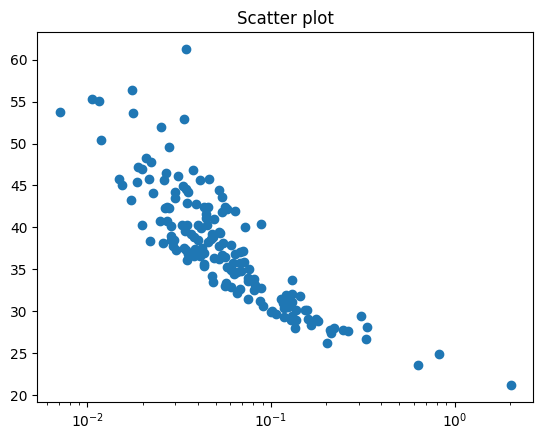

In [88]:
ax = plt.axes()
x = list(exoplanet_df["pl_orbsmax"])
y = tidalLockProbability

ax.scatter( x, y )
ax.set_title('Scatter plot')
ax.set_xscale('log')
plt.show()